# The Lego Collector's Dilemma  

## Problem statement

You are a die hard Lego enthusiast wishing to collect as many board sets as you can. But before that you wish to be able to predict the price of a new lego product before its price is revealed so that you can budget it from your revenue. Since (luckily!), you are a data scientist in the making, you wished to solve this problem yourself. This dataset contains information on lego sets scraped from lego.com. Each observation is a different lego set with various features like how many pieces in the set, rating for the set, number of reviews per set etc. Your aim is to build a linear regression model to predict the price of a set.


## About the Dataset:
The snapshot of the data, you will be working on :

![Dataset](../images/lego_data.PNG)

You can see that some of the features of `review_difficulty`, `theme_name` and `Country Name` in the data are textual in nature. Don't worry, we have made things simple for you with some behind-the-scenes data preprocessing.  We have also modified the feature of `age`. You will be learning about all these preprocessing techinques in a later concept. For now let us concentrate on getting those Lego sets in your hands soon. :) 

![Dataset](../images/new_le.png)


The dataset has details of 9910 lego sets with the following 10 features

|Feature|Description|
|-----|-----|
|age|Which age categories it belongs to|
|list_price|price of the set (in $)|
|num_reviews|number of reviews per set|
|piece_count| number of pieces in that lego set|
|play_star_rating|ratings|
|review_difficulty|difficulty level of the set|
|star_rating|ratings|
|theme_name|which theme it belongs|
|val_star_rating|ratings|
|country|country name|










## Load and visualize the data

The data is stored in `../data/` directory as `lego_final.csv`.

In this task you have to complete the following
- Import the required libraries
- Import the  data \[Hint: `np.loadtxt`\] 
- Separate it into $X$(paramaters/input data) and $Y$(the price, which is our output)
- Plot the price as function of any of the parameters (eg. no. of pieces)

In [1]:
# Import the required libraries

import os
import numpy as np
import matplotlib.pyplot as plt
data_file = os.path.join(os.pardir, 'data', 'lego_final.csv')
%matplotlib inline

In [2]:
# Import the data 

with open(data_file,'r') as file:
    header = file.readline().strip().split(',')

data = np.loadtxt(data_file, skiprows=1, delimiter=',')

# Separate input and output data

input_cols = np.ones(10,dtype=bool)
input_cols[1]=0
output_col = np.zeros(10,dtype=bool)
output_col[1]=1
Y = np.reshape(data[:,output_col], (-1,1))
X = data[:,input_cols]

# Check the dimensions of X and Y

print('Shape of X =', X.shape)
print('Shape of Y =', Y.shape)

Shape of X = (12261, 9)
Shape of Y = (12261, 1)


#### Expected Output
|X.shape|Y.shape|
|-----|-----|
|(12261,9)|(12261,1)|

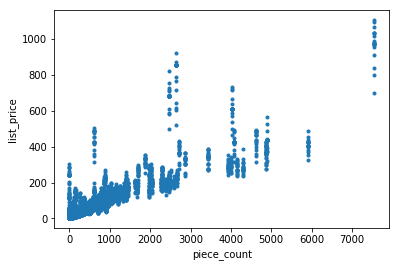

In [3]:
# Plot Price v/s Piece_Count

plt.scatter(X[:,2],Y,marker='.')
plt.xlabel(header[3])
plt.ylabel(header[1])
plt.show()

## Prepare for training

#### - Normalize the data
   - $\mu$ is the mean of $x$ and $\sigma$ is the standard deviation
     $$ X_{\text{normalized}} = \frac{X-\mu}{\sigma} $$
   - Hint: `np.mean` for calculating mean; `np.var` for calculating variance
   
#### - Randomly split the data into test and train
   - Shuffle the given data
   - Split the data in training set and test set
   - Usually for small datasets, a $60-40$ split is used; ie $60\%$ training and $40\%$ test
   - For this task we choose traning set of size 7500 and the rest as test set
   - Hint: `np.random.shuffle` and array slicing

In [4]:
# Normalize X

mu = np.mean(X,axis=0,keepdims=True)
var = np.var(X,axis=0)
X = (X-mu)/np.sqrt(var)

# Add a column of ones (For the constant term of linear regression)
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)

# Convert X and Y to column vectors (by sample)

X_trans = X.T
Y_trans = Y.T

# Check the dimensions of the transposes

print('Shape of X_transpose =',X_trans.shape)
print('Shape of Y_transpose =',Y_trans.shape)

Shape of X_transpose = (10, 12261)
Shape of Y_transpose = (1, 12261)


#### Expected Output
|X_transpose.shape|Y_transpose.shape|
|-----|-----|
|(10,12261)|(1,12261)|

In [5]:
# Shuffle the data
idx = np.arange(0,X_trans.shape[1])
np.random.shuffle(idx)

X_shuffled = X_trans[:,idx.T]
Y_shuffled = Y_trans[:,idx.T]

# Train and test split

X_train = X_shuffled[:,:7500]
Y_train = Y_shuffled[:,:7500]
X_test = X_shuffled[:,7500:]
Y_test = Y_shuffled[:,7500:]

# Check the dimensions of our train and test data and labels
print('Shape of X_train =',X_train.shape)
print('Shape of Y_train =',Y_train.shape)
print('Shape of X_test =',X_test.shape)
print('Shape of Y_test =',Y_test.shape)

Shape of X_train = (10, 7500)
Shape of Y_train = (1, 7500)
Shape of X_test = (10, 4761)
Shape of Y_test = (1, 4761)


#### Expected Output
|X_train.shape|Y_train.shape|X_test.shape|Y_test.shape|
|-----|-----|-----|-----|
|(10,7500)|(1,7500)|(10,4761)|(1,4761)|

## Define Cost Function and Hyperparameters

Our objective is to find the parameter vector $\theta$ which minimizes the distance between our predictions and the true values.

In particular we have to minimize the mean squared error(MSE) cost function which is defined as:

$$ J(\theta) = \frac{1}{2m} \sum_{i=1}^{10} \left( \theta_i x^{(i)} - y^{(i)} \right )^2$$

$$ J(\theta) = \frac{1}{2m} \sum_{} (\theta X - Y)^{2} $$

Where $m$ in the number of sample points (=12261 for us)


Given a $\theta$, the predictions of our model is given by

$$ y_{\text{predicted}}^{(k)} = \sum_{i=0}^{10} \theta_{i} x_{i}^{(k)}$$

In the vectorized form
$$ Y_{\text{predicted}} = \theta X$$


#### In this task we will do the following 
- Initialize $\theta$ to a matrix of zeros with proper dimension
- Set hyperparameters $\alpha$(learning rate) and `epochs`(number of interations over the training set)
- Define a function predict which takes X, theta as parameters and returns $Y_{\text{predicted}}$
- Define a function computeCost which takes X, Y, theta as parameters and returns the MSE cost

In [6]:
theta = np.zeros((1, X_train.shape[0]))
alpha = 0.01
epochs = 500

In [7]:
def predict(X, theta):
    return np.matmul(theta, X)

In [8]:
def computeCost(X,Y,theta):
    return 1/(2 * X.shape[1]) * np.sum(np.power((predict(X, theta)-Y),2))

In [9]:
print(X_train.shape)

(10, 7500)


## Write Backward Propagation and Gradient Descent

Update $\theta$ so as to reduce the cost using gradient descent

$$ \theta = \theta - \frac{\alpha}{m} \sum_{\text{samples}} \left(Y_{\text{predicted}} - Y\right).X$$
Where `.` represents element-wise product

In [10]:
def gradientDescent(X_train, Y_train, X_test, Y_test, theta, epochs, alpha):
    train_cost = np.zeros(epochs)
    test_cost = np.zeros(epochs)
    for i in range(epochs):
        theta = theta - (alpha/X_train.shape[1]) * np.sum((predict(X_train,theta)-Y_train)*X_train, axis=1)
        train_cost[i] = computeCost(X_train, Y_train, theta)
        test_cost[i] = computeCost(X_test, Y_test, theta)
    return theta,train_cost,test_cost

## Train and visualize test and train losses

Theta = [[ 64.68327903  -5.16091568   0.90513134  74.54416952   4.97097938
   -8.9158387   -2.53621089   7.33346798 -10.9309216    1.3043713 ]]
Final test cost = 997.9007477520336


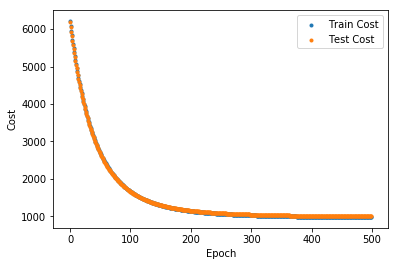

In [11]:
theta,train_cost,test_cost = gradientDescent(X_train,Y_train,X_test,Y_test,theta,epochs,alpha)
print('Theta =',theta)

finalCost = computeCost(X_test,Y_test,theta)
print('Final test cost =',finalCost)

plt.scatter(np.arange(epochs),train_cost,marker='.')
plt.scatter(np.arange(epochs),test_cost,marker='.')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.legend(['Train Cost','Test Cost'])
plt.show()

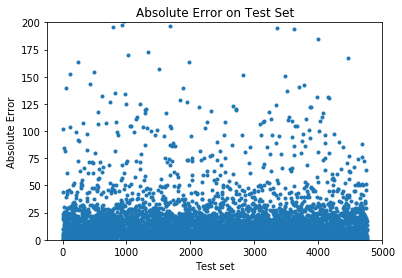

In [12]:
plt.scatter(np.arange(X_test.shape[1]),np.abs(predict(X_test,theta)-Y_test),marker='.')
plt.xlabel('Test set')
plt.ylim(0,200)
plt.ylabel('Absolute Error')
plt.title('Absolute Error on Test Set')
plt.show()